### Install modules using pip

In [14]:
import sys
print(sys.executable)

/usr/bin/python3.6


In [36]:
#! pip install module_name

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from subprocess import check_output
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from __future__ import division

import datetime

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import re
import os

from sklearn import metrics

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import forest

import math

import IPython, graphviz, sklearn_pandas, sklearn, warnings

from matplotlib import pyplot as plt, rcParams, animation

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

import PIL, os, numpy as np, math, collections, threading, json, bcolz, random, scipy, cv2

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load data from Kaggle

In [2]:
#Training data
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581780&Signature=AuTF4au9l3fRquIu5d3HY753GruZe2bJ35BdQZVOsKnSv%2BeLRBd%2Fw91Ekjbi%2B%2BKn%2BerH1UR%2F%2B4pq3nLv0ibNNJIGXBunj0NkX2AAC%2Bk6MJvRZmI1QK7h%2B5egypI9XBn032Ou6doaxJXJwCH5oKhX%2B%2FRMmaCj4yNOBgzma0ZVnW4JumTzrBZvuCjVVvmy2qKmmWYygpHjYEb1vgO2eBYMQnHvo%2B799om7fxBKM1Wvecmr3Gg%2F8Lo%2FuEavt9l%2BJw%2FJnTtgn277511FDTRzh%2FVE%2B%2Bf%2FOAO28XuL1XeI1wJqAqXF5wKgAlQbC5fSUth6AbT1EYY28hw4hnsPI%2BhTXuLOvg%3D%3D" -O "data/train.csv.zip" -c

#Test data
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581851&Signature=ApVTa%2B1O9KLvEVSVBF1xDnNgvZ%2BO6ezJlt1Vy%2BUKJ%2FsBWTqDg2e%2BT5kX2%2Bhsvgm3l3jng7yH2mX%2F30qQ4SszM72JVS5uiRycsVC1uyJOQsNTu3ciN1zEtUo2Q7n9gGHhwdyxGSUSMQ8887Ux%2FHL0hH6JgpL8wxttvSLhJSdjK6FaCfsHCcP9NBt4gzvUjIl8BmjjX9gvoxoKy%2BvgTwT%2FJddfbmkDjO7ijG%2BHUrEV9KYNUFIRzj4nU72mARcK68stkbck788sFcLRq5tUNNOMPCpU6JoVMAs%2Bb5PGQxqWAPg%2FcA03F9qYYz5Sjz7kVr6yfhY9c4FWnWqM1EIlFmSqBA%3D%3D" -O "data/test.csv.zip" -c

#Sample Sumbmission
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/sample_submission.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581898&Signature=lE%2BqBLECEqlKRIfqYKin%2BtQVzOhC8rpMxRjuLUO4t%2FJQPHBn%2B7X%2FNlBqOgJiOIIOJHtfGdSG9GgaVCVIrFXvvwXf6Nat2vtCEefyE5wcufG21MmruFdSTf3r2hJGdqMMCzprRz%2FM5xNyfNQ7JVc%2FtXwI5JlA8AbdpVuk%2Fq6HvfrzakRU60qnvHrnWmLpPl4IdWBlvZFWVgWXQR%2BC%2FnKx8hATeS3pPym9UuqgL5mg5Tyv85E1M76r8%2BNYBi22c0e36ojrbBUYRfDV29mHuySknYINVNgSTvYOVf%2B%2BEMIeumVnzmie0SPw2fs9VAo2CJDUbrutOMclQMNyrLJBkvDhnw%3D%3D" -O "data/sample_submission.csv.zip" -c



--2018-10-02 12:22:20--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10038/99000/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1538581780&Signature=AuTF4au9l3fRquIu5d3HY753GruZe2bJ35BdQZVOsKnSv%2BeLRBd%2Fw91Ekjbi%2B%2BKn%2BerH1UR%2F%2B4pq3nLv0ibNNJIGXBunj0NkX2AAC%2Bk6MJvRZmI1QK7h%2B5egypI9XBn032Ou6doaxJXJwCH5oKhX%2B%2FRMmaCj4yNOBgzma0ZVnW4JumTzrBZvuCjVVvmy2qKmmWYygpHjYEb1vgO2eBYMQnHvo%2B799om7fxBKM1Wvecmr3Gg%2F8Lo%2FuEavt9l%2BJw%2FJnTtgn277511FDTRzh%2FVE%2B%2Bf%2FOAO28XuL1XeI1wJqAqXF5wKgAlQbC5fSUth6AbT1EYY28hw4hnsPI%2BhTXuLOvg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.217.112, 2607:f8b0:4004:80f::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.217.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60345514 (58M) [application/zip]
Saving to: ‘data/train.csv.zip’

data/train.csv.zip  100%[===================>]  57.55M  84.7MB/s    in 0.7s    

2018

In [3]:
# Current directory
os.getcwd()

'/home/nbuser/DS_Explorations/GA_customer_revenue_prediction'

In [4]:
#Unzip files
dir_name = '/home/nbuser/DS_Explorations/GA_customer_revenue_prediction/data'
extension = ".zip"

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = dir_name + "/" + item
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

### Custom functions

In [2]:
#Describe a pandas dataframe
def advanced_describe(df):
    # get descriptive stats for dataframe for 'all' column dtypes
    desc = df.describe(include='all').T
    desc.drop(['top', 'freq', 'unique'], axis=1, inplace=True)
    
    # update column counts (df.describe() returns NaN for non-numeric cols)
    counts = pd.Series({ col: df[col].count() for col in df.columns })
    desc.update(counts.to_frame('count'))
    
    # add missing count/%
    missings = df.isnull().sum()
    desc = pd.concat([desc, missings.to_frame('missing')], axis=1, sort = True)
    desc['missing%'] = (desc['missing'] / len(desc)).round(2)

    # add unique counts/%
    uniques = pd.Series({ col: len(df[col].unique()) for col in df.columns })
    desc = pd.concat([desc, uniques.to_frame('unique')], axis=1, sort = True)
    desc['unique%'] = (desc['unique'] / len(desc)).round(2)
    
    unique_vals = pd.Series({ col: df[col].unique() for col in df.columns if len(df[col].unique()) < 20 })
    desc = pd.concat([desc, unique_vals.to_frame('unique_values')], axis=1, sort = True)
    
    # add col dtype
    dtypes = pd.Series({ col: df[col].dtype for col in df.columns })
    desc = pd.concat([desc, dtypes.to_frame('dtype')], axis=1, sort = True)
    
    return desc

In [3]:
#Just for display of DF on Notebook
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [4]:
#JSON Loader
def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [5]:
def add_datepart(df, fldname, drop=True):
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.

    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.

    Examples:
    ---------

    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df

        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13

    >>> add_datepart(df, 'A')
    >>> df

        AYear AMonth AWeek ADay ADayofweek ADayofyear AIs_month_end AIs_month_start AIs_quarter_end AIs_quarter_start AIs_year_end AIs_year_start AElapsed
    0   2000  3      10    11   5          71         False         False           False           False             False        False          952732800
    1   2000  3      10    12   6          72         False         False           False           False             False        False          952819200
    2   2000  3      11    13   0          73         False         False           False           False             False        False          952905600
    """
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [6]:
def is_date(x): return np.issubdtype(x.dtype, np.datetime64)

In [7]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    catagorical values. This applies the changes inplace.

    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.

    Examples:
    ---------

    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [72]:
def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.

    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.

    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.

    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category {a : 1, b : 2}

    >>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
    >>> apply_cats(df2, df)

           col1 col2
        0     1    b
        1     2    a
        2     3    a

    now the type of col is category {a : 1, b : 2}
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)

In [9]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.

    Parameters:
    -----------
    df: The data frame that will be changed.

    col: The column of data to fix by filling in missing data.

    name: The name of the new filled column in df.

    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.


    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2

    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False


    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2

    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2


    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2

    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [10]:
def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.

    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.

    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.

    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.

    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category { a : 1, b : 2}

    >>> numericalize(df, df['col2'], 'col3', None)

       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or col.nunique()>max_n_cat):
        df[name] = col.cat.codes+1

In [11]:
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [12]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.

    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.

    Returns:
    --------
    return value: A random sample of n rows of df.

    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    >>> get_sample(df, 2)
       col1 col2
    2     3    a
    1     2    b
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [13]:
def proc_df(df, y_fld, skip_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):

    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe.

    Parameters:
    -----------
    df: The data frame you wish to process.

    y_fld: The name of the response variable

    skip_flds: A list of fields that dropped from df.

    do_scale: Standardizes each column in df,Takes Boolean Values(True,False)

    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.

    preproc_fn: A function that gets applied to df.

    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.

    subset: Takes a random subset of size subset from df.

    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time(mean and standard deviation).

    Returns:
    --------
    [x, y, nas, mapper(optional)]:

        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.

        y: y is the response variable

        nas: returns a dictionary of which nas it created, and the associated median.

        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continous
        variables which is then used for scaling of during test-time.

    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category { a : 1, b : 2}

    >>> x, y, nas = proc_df(df, 'col1')
    >>> x

       col2
    0     1
    1     2
    2     1

    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])

    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])

    >>>round(fit_transform!(mapper, copy(data)), 2)

    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    df = df.copy()
    if preproc_fn: preproc_fn(df)
    y = df[y_fld].values 
    df.drop(skip_flds+[y_fld], axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    res = [pd.get_dummies(df, dummy_na=True), y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [14]:
def proc_test_df(df, na_dict, skip_flds=None, do_scale=False, 
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):

    """ Customization of proc_df for test data
        Ignore do_scale, mapper & preproc_fn, always pass them as None for now
        Returns: x
    """
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    df = df.copy()
    if preproc_fn: preproc_fn(df)

    if na_dict is None: na_dict = {}
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    #if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    res = pd.get_dummies(df, dummy_na=True)
    #if do_scale: res = res + [mapper]
    return res

### Load data

In [103]:
%%time
train_data = load_df('data/train.csv',50000)

Loaded train.csv. Shape: (50000, 54)
CPU times: user 8.02 s, sys: 92 ms, total: 8.11 s
Wall time: 16.2 s


In [6]:
display_all(train_data.head(5).transpose())

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
sessionId,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,27294437909732085_1472822600
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472830385,1472880147,1472865386,1472881213,1472822600
visitNumber,1,1,1,1,2
visitStartTime,1472830385,1472880147,1472865386,1472881213,1472822600
device.browser,Chrome,Firefox,Chrome,UC Browser,Chrome
device.browserSize,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [75]:
#Test data
test_data = load_df('data/test.csv',50000)

Loaded test.csv. Shape: (50000, 53)


In [59]:
#Sample submission
sample = pd.read_csv('data/sample_submission.csv')

In [12]:
sample.head(5)

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.0
1,0000049363351866189,0.0
2,0000053049821714864,0.0
3,0000059488412965267,0.0
4,0000085840370633780,0.0


### EDA

In [94]:
advanced_describe(train_data)

,count,mean,std,min,25%,50%,75%,max,missing,missing%,unique,unique%,unique_values,dtype
channelGrouping,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,8,0.15,"[Organic Search, Referral, Paid Search, Affili...",object
date,50000,2.01661e+07,4668.46,2.01608e+07,2.01611e+07,2.01701e+07,2.01705e+07,2.01706e+07,0,0.00,20,0.37,NaN,int64
device.browser,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,27,0.50,NaN,object
device.browserSize,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.browserVersion,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.deviceCategory,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,3,0.06,"[desktop, mobile, tablet]",object
device.flashVersion,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.isMobile,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,2,0.04,"[False, True]",bool
device.language,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object
device.mobileDeviceBranding,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,1,0.02,[not available in demo dataset],object


In [16]:
pd.value_counts(train_data["geoNetwork.subContinent"],normalize=True)

Northern America    0.508
Western Europe      0.073
Southern Asia       0.063
Northern Europe     0.063
Eastern Europe      0.055
South America       0.053
Southern Europe     0.049
Southeast Asia      0.046
Eastern Asia        0.037
Western Asia        0.019
Australasia         0.016
Central America     0.009
Western Africa      0.002
Southern Africa     0.002
Northern Africa     0.002
(not set)           0.001
Caribbean           0.001
Eastern Africa      0.001
Name: geoNetwork.subContinent, dtype: float64

In [17]:
train_data["totals.transactionRevenue"] = train_data["totals.transactionRevenue"].astype('float')
revenue = train_data.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

In [18]:
revenue.tail()

,fullVisitorId,totals.transactionRevenue
939,9960353142606371996,0.0
940,9966505186635465691,0.0
941,9976108007685501102,0.0
942,9987056085213279488,0.0
943,9991882289486375263,0.0


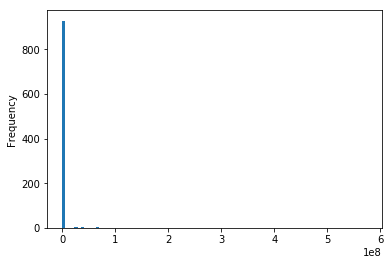

In [19]:
revenue["totals.transactionRevenue"].plot.hist(bins = 100)

In [20]:
# Check for 80/20 rule

In [21]:
revenue.sort_values(by = ["totals.transactionRevenue"],ascending=False,inplace=True)
revenue = revenue.assign(cum_revenue = revenue["totals.transactionRevenue"].cumsum())
revenue = revenue.assign(cum_revenue_pct = revenue["totals.transactionRevenue"].cumsum()/revenue["totals.transactionRevenue"].sum())
#Number of customers who contribute to 80% of revenue
(revenue[revenue.cum_revenue_pct <= 0.81].fullVisitorId.nunique())

5

In [22]:
#% of customers who contribute to 80% of revenue
((revenue[revenue.cum_revenue_pct <= 0.81].fullVisitorId.nunique())/revenue.shape[0])

0.005296610169491525

In [23]:
#Non zero revenue customers
nzi = pd.notnull(train_data["totals.transactionRevenue"]).sum()
nzr = (revenue["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train_data.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / revenue.shape[0])

Number of instances in train set with non-zero revenue :  16  and ratio is :  0.016
Number of unique customers with non-zero revenue :  16 and the ratio is :  0.01694915254237288


In [24]:
#Visitors in test and train data
print("Number of unique visitors in train set : ",train_data.fullVisitorId.nunique(), " out of rows : ",train_data.shape[0])
print("Number of unique visitors in test set : ",test_data.fullVisitorId.nunique(), " out of rows : ",test_data.shape[0])
print("Number of common visitors in train and test set : ",len(set(train_data.fullVisitorId.unique()).intersection(set(test_data.fullVisitorId.unique())) ))

Number of unique visitors in train set :  944  out of rows :  1000
Number of unique visitors in test set :  947  out of rows :  1000
Number of common visitors in train and test set :  0


In [17]:
#Columns in constant values
const_cols = [c for c in train_data.columns if train_data[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

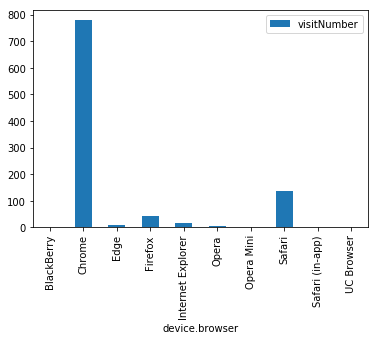

In [26]:
#Device information
train_data.groupby(['device.browser']).agg({'visitNumber': 'count'}).reset_index().set_index("device.browser",drop=True).plot.bar()

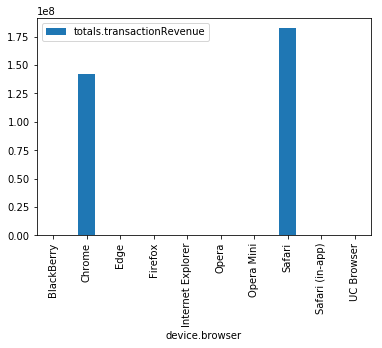

In [27]:
#Mean Revenue
train_data.groupby(['device.browser']).agg({'totals.transactionRevenue': 'mean'}).reset_index().set_index("device.browser",drop=True).plot.bar()

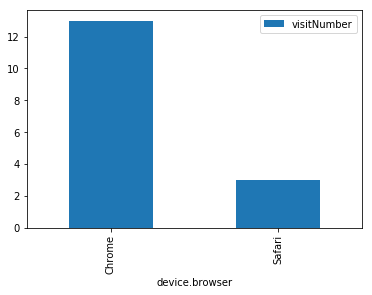

In [28]:
#Non Zero Revenue
train_data[train_data['totals.transactionRevenue'].notnull()].groupby(['device.browser']).agg({'visitNumber': 'count'}).reset_index().set_index("device.browser",drop=True).plot.bar()

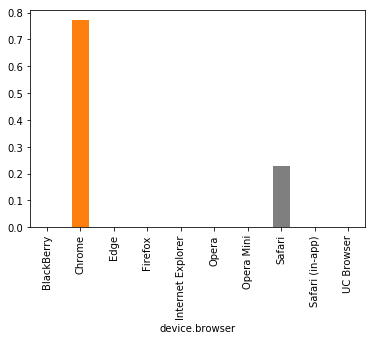

In [29]:
#Proportions in when looking at sum of revenue
device_browser = train_data.groupby(['device.browser']).agg({'totals.transactionRevenue': 'sum'}).reset_index()
device_browser = device_browser.assign(pct = (device_browser["totals.transactionRevenue"]/device_browser["totals.transactionRevenue"].sum()))
device_browser.set_index("device.browser",drop=True)["pct"].plot.bar()

In [32]:
#Look at top browsers within OS w.r.t. Page views
device = train_data.groupby(["device.browser","device.operatingSystem","device.isMobile"]).agg({'totals.transactionRevenue': 'sum'})
device.sort_values(by = ["device.browser","totals.transactionRevenue"],ascending=False)

totals.transactionRevenue
device.browser    device.operatingSystem device.isMobile                           
UC Browser        Linux                  False                         0.000000e+00
Safari (in-app)   iOS                    True                          0.000000e+00
Safari            Macintosh              False                         4.302100e+08
                  iOS                    True                          1.173400e+08
Opera Mini        Android                True                          0.000000e+00
Opera             Android                True                          0.000000e+00
                  Macintosh              False                         0.000000e+00
                  Windows                False                         0.000000e+00
Internet Explorer Windows                False                         0.000000e+00
Firefox           Android                True                          0.000000e+00
                  Linux                  False                         0.000000e+00
                  Macintosh              False                         0.000000e+00
                  Windows                False                         0.000000e+00
Edge              Windows                False                         0.000000e+00
Chrome            Macintosh              False                         1.470850e+09
                  Linux                  False                         2.021900e+08
                  Windows                False                         1.077500e+08
                  Android                True                          3.548000e+07
                  Chrome OS              False                         3.508000e+07
                  iOS                    True                          0.000000e+00
BlackBerry        BlackBerry             True                          0.000000e+00

In [33]:
#Proportions of browser usage within OS
device = train_data.groupby(['device.browser',"device.operatingSystem","device.isMobile"]).agg({'totals.transactionRevenue': 'sum'})
device = device.groupby(level=[0]).apply(lambda x:100 * x / float(x.sum()))
device #.reset_index()

totals.transactionRevenue
device.browser    device.operatingSystem device.isMobile                           
BlackBerry        BlackBerry             True                                   NaN
Chrome            Android                True                              1.916439
                  Chrome OS              False                             1.894833
                  Linux                  False                            10.921220
                  Macintosh              False                            79.447430
                  Windows                False                             5.820077
                  iOS                    True                              0.000000
Edge              Windows                False                                  NaN
Firefox           Android                True                                   NaN
                  Linux                  False                                  NaN
                  Macintosh              False                                  NaN
                  Windows                False                                  NaN
Internet Explorer Windows                False                                  NaN
Opera             Android                True                                   NaN
                  Macintosh              False                                  NaN
                  Windows                False                                  NaN
Opera Mini        Android                True                                   NaN
Safari            Macintosh              False                            78.569994
                  iOS                    True                             21.430006
Safari (in-app)   iOS                    True                                   NaN
UC Browser        Linux                  False                                  NaN

### Data prep for model input

In [105]:
#Columns different in train and test data
print("Variables not in test but in train : ", set(train_data.columns).difference(set(test_data.columns)))

Variables not in test but in train :  {'totals.transactionRevenue'}


In [106]:
col_to_remove = list(set(train_data.columns).difference(set(test_data.columns)))

In [107]:
#Get the correct columns in train and test data
cols_to_drop = const_cols + col_to_remove + ["sessionId"]
cols_to_drop = [x for x in cols_to_drop if x not in ["totals.transactionRevenue","date"]]
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

In [20]:
#get a sense of indvidual data types
train_data.dtypes

channelGrouping                                         object
date                                            datetime64[ns]
fullVisitorId                                           object
visitId                                                  int64
visitNumber                                              int64
visitStartTime                                  datetime64[ns]
device.browser                                          object
device.deviceCategory                                   object
device.isMobile                                           bool
device.operatingSystem                                  object
geoNetwork.city                                         object
geoNetwork.continent                                    object
geoNetwork.country                                      object
geoNetwork.metro                                        object
geoNetwork.networkDomain                                object
geoNetwork.region                                      

In [108]:
#convert date and visitStarttime to datetime format
train_data['visitStartTime'] = pd.to_datetime(train_data['visitStartTime'],unit='s')
train_data['date'] = pd.to_datetime(train_data['date'].astype('str'))

test_data['visitStartTime'] = pd.to_datetime(test_data['visitStartTime'],unit='s')
test_data['date'] = pd.to_datetime(test_data['date'].astype('str'))

In [109]:
all_cols = list(train_data.columns)

In [110]:
#convert anything within totals to numeric
num_cols = [x for x in all_cols if x.startswith("total")]
for col in num_cols:
    train_data[col] = train_data[col].astype(float)
    
for col in num_cols:
    if col not in ["totals.transactionRevenue"]:
        test_data[col] = test_data[col].astype(float)    

In [19]:
display_all(train_data.head().T)

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
visitId,1472830385,1472880147,1472865386,1472881213,1472822600
visitNumber,1,1,1,1,2
visitStartTime,2016-09-02 15:33:05,2016-09-03 05:22:27,2016-09-03 01:16:26,2016-09-03 05:40:13,2016-09-02 13:23:20
device.browser,Chrome,Firefox,Chrome,UC Browser,Chrome
device.deviceCategory,desktop,desktop,desktop,desktop,mobile
device.isMobile,False,False,False,False,True
device.operatingSystem,Windows,Macintosh,Windows,Linux,Android


In [111]:
#Extract date features from date fields
add_datepart(train_data,"date")
add_datepart(train_data,"visitStartTime")

add_datepart(test_data,"date")
add_datepart(test_data,"visitStartTime")

In [47]:
test_data.dtypes

channelGrouping                                 category
fullVisitorId                                   category
visitId                                            int64
visitNumber                                        int64
device.browser                                  category
device.deviceCategory                           category
device.isMobile                                     bool
device.operatingSystem                          category
geoNetwork.city                                 category
geoNetwork.continent                            category
geoNetwork.country                              category
geoNetwork.metro                                category
geoNetwork.networkDomain                        category
geoNetwork.region                               category
geoNetwork.subContinent                         category
totals.bounces                                   float64
totals.hits                                      float64
totals.newVisits               

In [112]:
#Since train_cats and apply_cats have issue with NaNs with Bool values, 
#we will do missing value treatment with fields with Bool and NaN before proc_df application
for n,c in train_data.items():
    if train_data[n].dtype.name == 'object' and any(elem in [True,False]  for elem in list(train_data[n])): 
        print(n)
        train_data[n] = train_data[n].astype(str)
        
for n,c in test_data.items():
    if train_data[n].dtype.name == 'object' and any(elem in [True,False]  for elem in list(train_data[n])): 
        print(n)
        test_data[n] = test_data[n].astype(str)

trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [113]:
train_cats(train_data)
apply_cats(test_data,train_data)

In [114]:
#For RMLSE
train_data["totals.transactionRevenue"] = train_data["totals.transactionRevenue"].fillna(0.0)
train_data["totals.transactionRevenue"] = np.log1p(train_data["totals.transactionRevenue"])

In [115]:
#Conversion of Training data into all Numerics 
train_df, y, nas = proc_df(train_data, 'totals.transactionRevenue')

In [116]:
train_df.dtypes

channelGrouping                                    int8
fullVisitorId                                     int64
visitId                                           int64
visitNumber                                       int64
device.browser                                     int8
device.deviceCategory                              int8
device.isMobile                                    bool
device.operatingSystem                             int8
geoNetwork.city                                   int16
geoNetwork.continent                               int8
geoNetwork.country                                int16
geoNetwork.metro                                   int8
geoNetwork.networkDomain                          int16
geoNetwork.region                                 int16
geoNetwork.subContinent                            int8
totals.bounces                                  float64
totals.hits                                     float64
totals.newVisits                                

In [117]:
#Conversion of test data into all Numerics
test_df = proc_test_df(test_data, nas)

In [118]:
test_df.dtypes

channelGrouping                                    int8
fullVisitorId                                     int64
visitId                                           int64
visitNumber                                       int64
device.browser                                     int8
device.deviceCategory                              int8
device.isMobile                                    bool
device.operatingSystem                             int8
geoNetwork.city                                   int16
geoNetwork.continent                               int8
geoNetwork.country                                int16
geoNetwork.metro                                   int8
geoNetwork.networkDomain                          int16
geoNetwork.region                                 int16
geoNetwork.subContinent                            int8
totals.bounces                                  float64
totals.hits                                     float64
totals.newVisits                                

### Baseline model

### Clean up

In [119]:
#remove csv files to save on memory charges
dir_name = '/home/nbuser/DS_Explorations/GA_customer_revenue_prediction/data'
extension = ".csv"
for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension):
        file_name = dir_name + "/" + item
        os.remove(file_name) # delete csv file